<a href="https://colab.research.google.com/github/choibumku00/busan_landmark_analysis/blob/main/busan_landmark_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 부산 랜드마크 관광객 수 분석 및 예측

In [ ]:
# 한글표현을 위해 폰트를 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame

data = pd.read_excel("./주요관광지점 입장객(2014 이후)_231005025841.xls")

# Display the first few rows of the data for an initial overview
data.head()

,시도,군구,관광지,내/외국인,총계,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,부산광역시,중구,용두산공원(부산타워),내국인,59793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59793.0
1,부산광역시,중구,용두산공원(부산타워),합계,59793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59793.0
2,부산광역시,서구,송도구름산책로,내국인,3415303,NaN,NaN,NaN,NaN,NaN,1839121.0,763991.0,540655.0,271536.0,NaN
3,부산광역시,서구,송도구름산책로,합계,3415303,NaN,NaN,NaN,NaN,NaN,1839121.0,763991.0,540655.0,271536.0,NaN
4,부산광역시,영도구,태종대 관광지,내국인,6642355,1041515.0,673414.0,949135.0,1083127.0,851717.0,821479.0,207225.0,273369.0,482013.0,259361.0


## 데이터 필터링
현재 데이터에는 내/외국인이 포함되어있는데 여기서 합계 데이터만 사용한다.
또한, 데이터가 없는 년도가 있는 랜드마크가 있어 데이터가 없는 행은 제외한다.

In [ ]:
# Filter the data based on given conditions
filtered_data = data[data['내/외국인'] == '합계'].dropna()

filtered_data

,시도,군구,관광지,내/외국인,총계,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
6,부산광역시,영도구,태종대 관광지,합계,6642355,1041515.0,673414.0,949135.0,1083127.0,851717.0,821479.0,207225.0,273369.0,482013.0,259361.0
11,부산광역시,남구,부산시립박물관,합계,1467350,223216.0,193300.0,198031.0,178400.0,183074.0,209296.0,41197.0,38401.0,130337.0,72098.0
23,부산광역시,해운대구,누리마루 APEC하우스,합계,12728213,1629060.0,1499243.0,1937831.0,2175404.0,2064685.0,1979856.0,321345.0,112094.0,578129.0,430566.0
26,부산광역시,해운대구,부산아쿠아리움,합계,6688392,1029261.0,829060.0,875672.0,782621.0,744998.0,696865.0,302206.0,481623.0,643293.0,302793.0
28,부산광역시,사하구,감천문화마을,합계,17079433,656163.0,1381361.0,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0,1334492.0,1750775.0,1278912.0
35,부산광역시,강서구,한국마사회 렛츠런파크 부산경남,합계,7602630,1715638.0,867684.0,1029611.0,981213.0,906717.0,932380.0,113130.0,123752.0,597715.0,334790.0


## 데이터 시각화

### 그래프
태종대, 부산시립박물관, 누리마루 APEC하우스, 부산아쿠아리움
,**감천문화마을**
,한국마사회 렛츠런파크 부산경남이 코로나 이후 모든 광광지들이 회복을 못 한 것을 볼 수 있다.

태종대 관광지
부산시립박물관
누리마루 APEC하우스
부산아쿠아리움
감천문화마을
한국마사회 렛츠런파크 부산경남


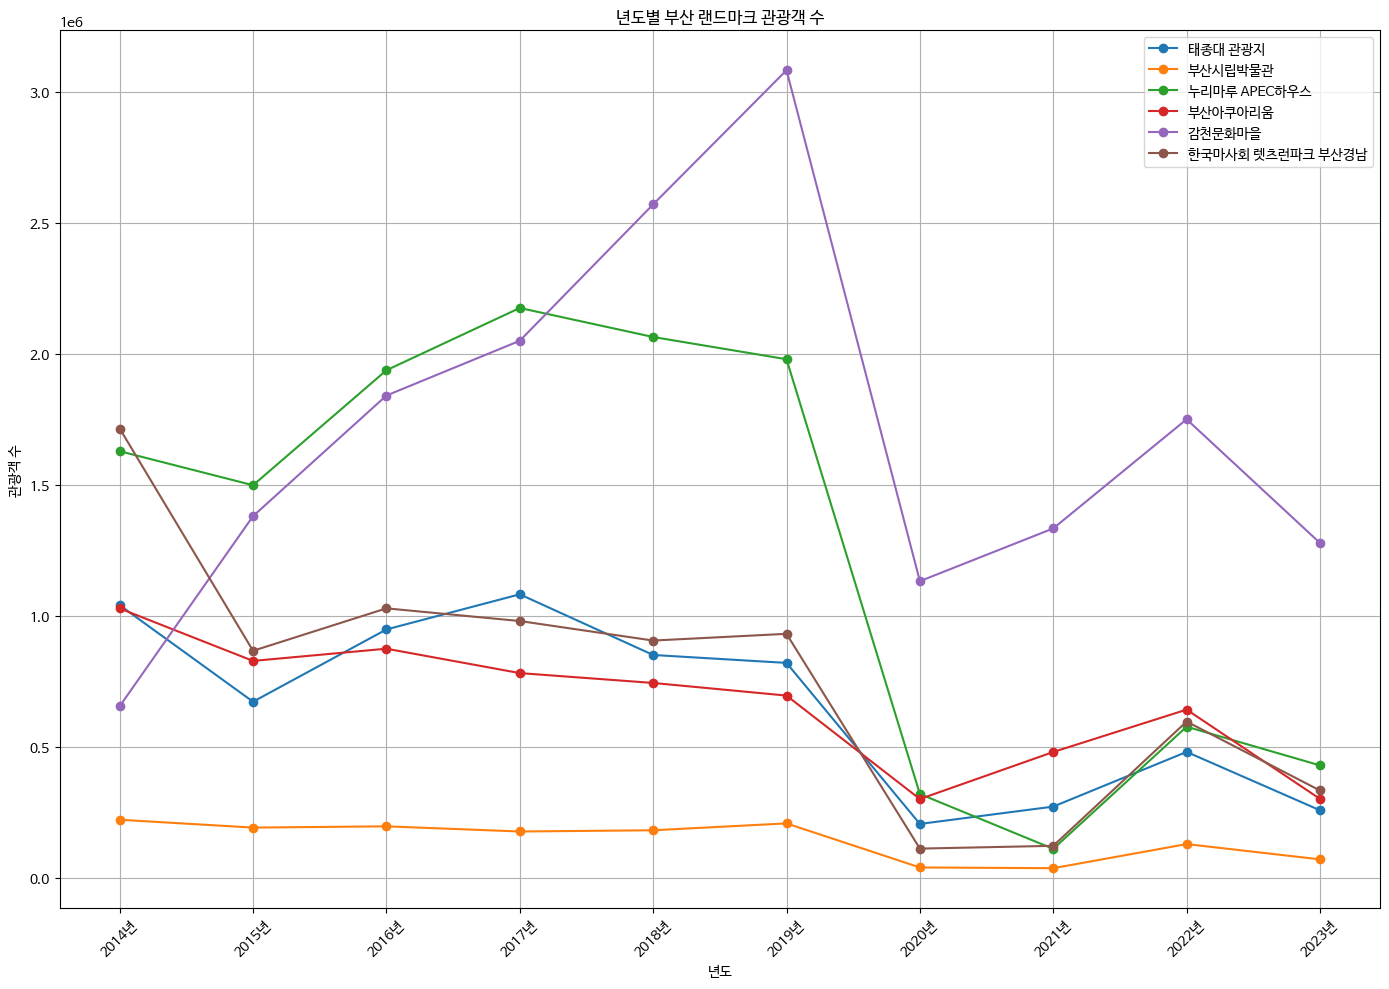

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 10))

# For each landmark, plot the yearwise visitor data
for index, row in filtered_data.iterrows():
    plt.plot(row.index[5:], row.values[5:], label=row['관광지'], marker='o')
    print(row['관광지'])
# Setting the title and labels
plt.rc('font', family='NanumBarunGothic')
plt.title("년도별 부산 랜드마크 관광객 수")
plt.xlabel("년도")
plt.ylabel("관광객 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

## 선형회귀를 이용한 2030년까지의 예측

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the years present in the data and future years for prediction
current_years = np.array(range(2014, 2024)).reshape(-1, 1)
future_years = np.array(range(2024, 2031)).reshape(-1, 1)

# Initialize a dictionary to store predictions for each landmark
predictions = {}

# For each landmark, fit a Linear Regression model and predict future visitor counts
for index, row in filtered_data.iterrows():
    # Extract the visitor counts for current years
    y = row.values[5:].reshape(-1, 1)

    # Initialize and train a Linear Regression model
    reg = LinearRegression().fit(current_years, y)

    # Predict the visitor counts for future years
    y_pred = reg.predict(future_years)

    # Store the predictions in the dictionary
    predictions[row['관광지']] = y_pred.flatten()

predictions

{'태종대 관광지': array([ 183703.26666668,   96333.76969698,    8964.27272728,
         -78405.22424242, -165774.72121212, -253144.21818182,
        -340513.71515152]),
 '부산시립박물관': array([ 47257.        ,  29170.09090909,  11083.18181818,  -7003.72727273,
        -25090.63636364, -43177.54545455, -61264.45454545]),
 '누리마루 APEC하우스': array([ 205823.4666667 ,   11823.86060607, -182175.74545455,
        -376175.35151511, -570174.95757574, -764174.56363636,
        -958174.16969693]),
 '부산아쿠아리움': array([ 292232.39999998,  223758.43636361,  155284.47272724,
          86810.5090909 ,   18336.54545453,  -50137.41818184,
        -118611.38181821]),
 '감천문화마을': array([1821851.99999999, 1842562.67272726, 1863273.34545454,
        1883984.01818182, 1904694.69090909, 1925405.36363636,
        1946116.03636363]),
 '한국마사회 렛츠런파크 부산경남': array([  46086.46666667,  -83763.81212121, -213614.09090909,
        -343464.36969697, -473314.64848486, -603164.92727271,
        -733015.20606059])}

## 분석 결론
감천 문화마을을 제외한 모든 관광지의 방문객 수가 줄 것이라고 예측한다.<br>
또 일본의 후쿠시마 오염수 방수로 바다와 관련된 관광자는 더 줄 것이라고 예측된다. <br>부산의 경우 관광산업으로 분류된 8개 산업의 생산비중은 23.12%에 해당한다. 부산시의 지속적인 발전과 관광산업에서 나오는 여러 일자리들을 위하여 부산시는 현재의관광지를 개발하고 새로운 관광산업을 계획해야 한다.

<ipython-input-14-8dde1af8f022>:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


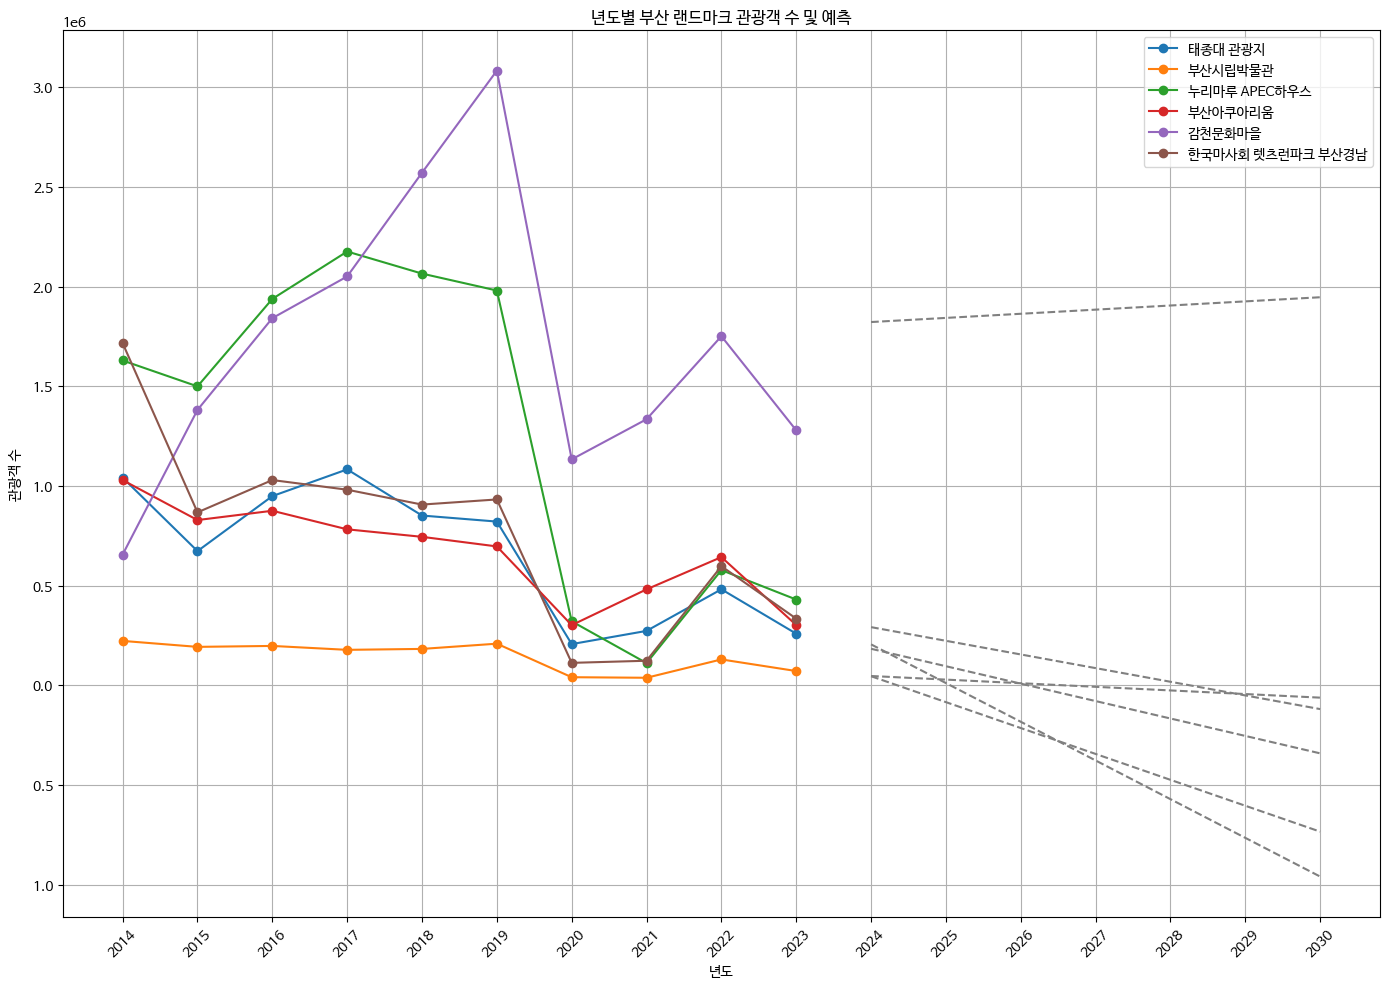

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 10))

# For each landmark, plot the current and predicted visitor data
for index, row in filtered_data.iterrows():
    plt.plot(current_years.flatten(), row.values[5:], label=row['관광지'], marker='o')
    plt.plot(future_years.flatten(), predictions[row['관광지']], linestyle='dashed', color='grey')

# Setting the title and labels
plt.rc('font', family='NanumBarunGothic')
plt.title("년도별 부산 랜드마크 관광객 수 및 예측")
plt.xlabel("년도")
plt.ylabel("관광객 수")
plt.xticks(np.arange(2014, 2031, 1), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()